In [5]:
import json
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("../")
from plotting_parameters import *

In [16]:
def load_metrics(file):
    metrics = []
    with open(file, 'r') as f:
        results = json.load(f)
        metrics.append(results['accuracy'])
        metrics.append(results['precision'])
        metrics.append(results['recall'])
        metrics.append(results['specificity'])
        metrics.append(results['f1_score'])
        # check if 'roc_auc' is in the results
        if 'roc_auc' in results:
            metrics.append(results['roc_auc'])
        if 'label_counts' in results:
            return metrics, results['label_counts']
    return metrics

def fold_mean_metrics(results_dir):
    metrics = []
    for i, file in enumerate(['fold1_metrics.json', 'fold2_metrics.json', 'fold3_metrics.json', 'fold4_metrics.json', 'fold5_metrics.json']):     
        metrics.append(load_metrics(results_dir+file))
    metrics_mean = np.mean(metrics, axis=0)
    metrics_std = np.std(metrics, axis=0)
    return metrics_mean, metrics_std


def knn_metrics(folder):
    # iterate through all files in the folder
    metrics = []
    for file in os.listdir(folder):
        if file.endswith('.json'):
            img_metrics, img_label_count = load_metrics(os.path.join(folder, file))
            # set metrics to nan if class is not present in the image
            for i, count in enumerate(img_label_count):
                if count == 0:
                    for metric in img_metrics:
                        metric[i] = np.nan
            metrics.append(img_metrics)
    metrics_mean = np.nanmean(metrics, axis=0)
    metrics_std = np.nanstd(metrics, axis=0)
    return metrics_mean, metrics_std
            
# scores_bl, stds_bl = fold_mean_metrics('./models7/baseline/combined/results')
# scores_hm, stds_hm = fold_mean_metrics('./models7/heatmaps/combined/results')

# scores_bl, stds_bl = knn_metrics('./models7/baseline/combined/results/knn_metrics')
# scores_hm, stds_hm = knn_metrics('./models7/heatmaps/combined/results/knn_metrics')

# set_plotting_style("latex")
# fig, axs = plt.subplots(1,4, figsize=(5.8,2))
# metrics = ['Accuracy', 'Precision', 'Recall', 'Specificity']# 'F1 Score']#, 'ROC AUC']
# for i, metric, score_bl, score_hm, std_bl, std_hm in zip(range(4), metrics, scores_bl, scores_hm, stds_bl, stds_hm):
#     axs[i].axhline(y=1, color='black', linestyle='--', linewidth=0.5, zorder=1)
#     axs[i].errorbar(range(0,12,3), score_bl, yerr=std_bl, fmt='none', ecolor=tum_red_dark, capsize=1.5, zorder=1)
#     axs[i].bar(range(0,12,3), score_bl, color=tum_red, label='Baseline all data', zorder=2)
#     axs[i].errorbar(range(1,12,3), score_hm, yerr=std_hm, fmt='none', ecolor=tum_green_dark, capsize=1.5, zorder=1)
#     axs[i].bar(range(1,12,3), score_hm, color=tum_green, label='Heatmaps all data', zorder=2)
#     axs[i].set_xticks([0.5, 3.5, 6.5, 9.5])
#     axs[i].set_xticklabels(['NT', 'TT', 'BV', 'BG'])
#     axs[i].set_title(metric)
#     axs[i].set_yticks([])
#     axs[i].set_ylim(0.0,1.16)
#     axs[i].set_xlim(-1, 11)
#     #add dashed line at y=1
#     axs[i].tick_params(axis='x', which='both', bottom=False, top=False,
#                left=False, right=False, labelbottom=True, labelleft=True)
# axs[0].set_yticks([0.0,0.2,0.4, 0.6, 0.8, 1])
# # save figure as svg
# plt.tight_layout()
# plt.savefig('../../figures/bl_hm_knn_metrics.svg', bbox_inches='tight', format='svg')

# import csv
# with open('results3.csv', 'w') as f:
#     writer = csv.writer(f)
#     writer.writerow(['Class', 'NT','NT', 'TT','TT', 'BV','BV', 'BG','BG'])
#     writer.writerow(['model', 'BL', 'HM', 'BL', 'HM', 'BL', 'HM', 'BL', 'HM'])
#     for metric, score_bl, score_hm in zip(['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 score', 'AUC ROC'], scores_bl, scores_hm):
#         writer.writerow([metric, score_bl[0], score_hm[0], score_bl[1], score_hm[1], score_bl[2], score_hm[2], score_bl[3], score_hm[3]])

In [ ]:
scores_bl, stds_bl = fold_mean_metrics('./models7/baseline/combined/results/')
scores_hm, stds_hm = fold_mean_metrics('./models7/heatmaps/combined/results/')
scores_hm_only, stds_hm_only = fold_mean_metrics('./models7/heatmap_only/combined/results/')
scores_nmc, stds_nmc = fold_mean_metrics('./models_nmc/models/results/')

import csv
with open('results_std.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['Class', 'NT','NT','NT','NT', 'TT','TT', 'TT','TT','BV','BV', 'BV','BV','BG','BG','BG','BG'])
    writer.writerow(['model', 'BL', 'HM', 'HMO', 'NMC', 'BL', 'HM', 'HMO', 'NMC', 'BL', 'HM', 'HMO', 'NMC', 'BL', 'HM', 'HMO', 'NMC'])
    for metric, score_bl, std_bl, score_hm, std_hm, score_hm_only, std_hm_only, score_nmc, std_nmc in zip(['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 score'], scores_bl, stds_bl, scores_hm, stds_hm, scores_hm_only, stds_hm_only, scores_nmc, stds_nmc):
        writer.writerow([metric, score_bl[0], score_hm[0], score_hm_only[0], score_nmc[0], score_bl[1], score_hm[1], score_hm_only[1], score_nmc[1], score_bl[2], score_hm[2], score_hm_only[2], score_nmc[2], score_bl[3], score_hm[3], score_hm_only[3], score_nmc[3]])
        writer.writerow([metric + 'std', std_bl[0], std_hm[0], std_hm_only[0], std_nmc[0], std_bl[1], std_hm[1], std_hm_only[1], std_nmc[1], std_bl[2], std_hm[2], std_hm_only[2], std_nmc[2], std_bl[3], std_hm[3], std_hm_only[3], std_nmc[3]])

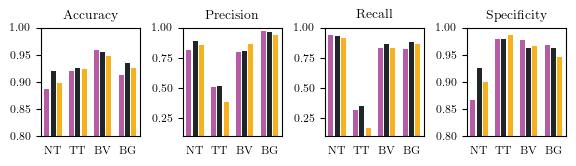

In [8]:
scores_bl, stds_bl = fold_mean_metrics('./models7/baseline/v1_1/results')
scores_hm, stds_hm = fold_mean_metrics('./models7/heatmaps/v1_1/results')
scores_ohm, stds_ohm = fold_mean_metrics('./models7/heatmap_only/v1_1/results')

scores_bl, stds_bl = knn_metrics('./models7/baseline/combined/results/knn_metrics')
scores_hm, stds_hm = knn_metrics('./models7/heatmaps/combined/results/knn_metrics')
scores_ohm, stds_ohm = knn_metrics('./models7/heatmap_only/combined/results/knn_metrics')



set_plotting_style("latex")
fig, axs = plt.subplots(1,4, figsize=(5.8,1.7))
metrics = ['Accuracy', 'Precision', 'Recall', 'Specificity']# 'F1 Score']#, 'ROC AUC']
for i, metric, score_bl, score_hm, score_ohm, std_bl, std_hm, std_ohm  in zip(range(4), metrics, scores_bl, scores_hm, scores_ohm, stds_bl, stds_hm, stds_ohm):
    axs[i].axhline(y=1, color='black', linestyle='--', linewidth=0.5, zorder=1)
    # axs[i].errorbar(range(0,16,4), score_bl, yerr=std_bl, fmt='none', ecolor=tum_grey_3, capsize=1.5, zorder=1)
    axs[i].bar(range(0,16,4), score_bl, color=tum_pink, label='Baseline all data', zorder=2)
    # axs[i].errorbar(range(1,16,4), score_hm, yerr=std_hm, fmt='none', ecolor=tum_blue_dark, capsize=1.5, zorder=1)
    axs[i].bar(range(1,16,4), score_hm, color=tum_grey_1, label='Heatmaps all data', zorder=2)
    # axs[i].errorbar(range(2,16,4), score_ohm, yerr=std_ohm, fmt='none', ecolor=tum_blue_light, capsize=1.5, zorder=1)
    axs[i].bar(range(2,16,4), score_ohm, color=tum_orange, label='Heatmaps only', zorder=2)
    axs[i].set_xticks([1, 5, 9, 13])
    axs[i].set_xticklabels(['NT', 'TT', 'BV', 'BG'])
    axs[i].set_title(metric)
    # axs[i].set_yticks([])
    # axs[i].set_ylim(0.0,1.16)
    axs[i].set_xlim(-1, 15)
    #add dashed line at y=1
    axs[i].tick_params(axis='x', which='both', bottom=False, top=False,
               left=False, right=False, labelbottom=True, labelleft=True)


axs[0].set_ylim(0.8,1)
axs[1].set_ylim(0.1,1)
axs[2].set_ylim(0.1,1)
axs[3].set_ylim(0.8,1)

plt.tight_layout()

plt.savefig('../../poster/models_metrics_small.svg', bbox_inches='tight', format='svg')

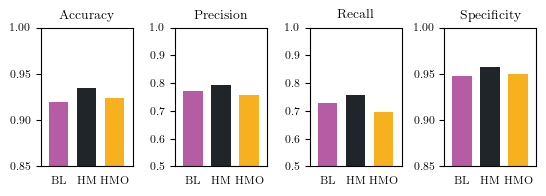

In [35]:
scores_bl, stds_bl = fold_mean_metrics('./models7/baseline/v1_1/results')
scores_hm, stds_hm = fold_mean_metrics('./models7/heatmaps/v1_1/results')
scores_ohm, stds_ohm = fold_mean_metrics('./models7/heatmap_only/v1_1/results')

scores_bl, stds_bl = knn_metrics('./models7/baseline/combined/results/knn_metrics')
scores_hm, stds_hm = knn_metrics('./models7/heatmaps/combined/results/knn_metrics')
scores_ohm, stds_ohm = knn_metrics('./models7/heatmap_only/combined/results/knn_metrics')



set_plotting_style("latex")
fig, axs = plt.subplots(1,4, figsize=(5.5,2))
metrics = ['Accuracy', 'Precision', 'Recall', 'Specificity']# 'F1 Score']#, 'ROC AUC']
for i, metric, score_bl, score_hm, score_ohm, std_bl, std_hm, std_ohm  in zip(range(4), metrics, scores_bl, scores_hm, scores_ohm, stds_bl, stds_hm, stds_ohm):
    axs[i].axhline(y=1, color='black', linestyle='--', linewidth=0.5, zorder=1)
    axs[i].bar(0, np.mean(score_bl), color=tum_pink, label='Baseline all data', zorder=2, width=0.7)
    axs[i].bar(1, np.mean(score_hm), color=tum_grey_1, label='Heatmaps all data', zorder=2, width=0.7)
    axs[i].bar(2, np.mean(score_ohm), color=tum_orange, label='Heatmaps only', zorder=2, width=0.7)
    axs[i].set_xticks([0, 1, 2,])
    axs[i].set_xticklabels(['BL','HM', 'HMO'])
    axs[i].set_title(metric)
    # axs[i].set_yticks([])
    # axs[i].set_ylim(0.0,1.16)
    axs[i].set_xlim(-0.65, 2.65)
    #add dashed line at y=1
    axs[i].tick_params(axis='x', which='both', bottom=False, top=False,
               left=False, right=False, labelbottom=True, labelleft=True)


axs[0].set_ylim(0.85,1)
axs[1].set_ylim(0.5,1)
axs[2].set_ylim(0.5,1)
axs[3].set_ylim(0.85,1)

plt.tight_layout()

plt.savefig('../../poster/models_metrics_reduced_small.svg', bbox_inches='tight', format='svg')

Plot and save metrics for three models

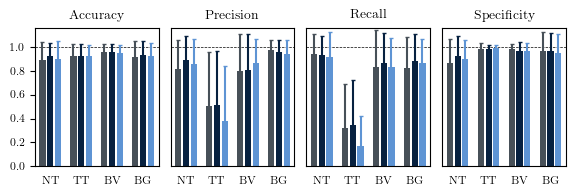

In [9]:
def load_metrics(file):
    metrics = []
    with open(file, 'r') as f:
        results = json.load(f)
        metrics.append(results['accuracy'])
        metrics.append(results['precision'])
        metrics.append(results['recall'])
        metrics.append(results['specificity'])
        metrics.append(results['f1_score'])
        # check if 'roc_auc' is in the results
        if 'roc_auc' in results:
            metrics.append(results['roc_auc'])
        if 'label_counts' in results:
            return metrics, results['label_counts']
    return metrics

def fold_mean_metrics(results_dir):
    metrics = []
    for i, file in enumerate(['fold1_metrics.json', 'fold2_metrics.json', 'fold3_metrics.json', 'fold4_metrics.json', 'fold5_metrics.json']):
        metrics.append(load_metrics(os.path.join(results_dir, file)))
    metrics_mean = np.mean(metrics, axis=0)
    metrics_std = np.std(metrics, axis=0)
    return metrics_mean, metrics_std


def knn_metrics(folder):
    # iterate through all files in the folder
    metrics = []
    for file in os.listdir(folder):
        if file.endswith('.json'):
            img_metrics, img_label_count = load_metrics(os.path.join(folder, file))
            # set metrics to nan if class is not present in the image
            for i, count in enumerate(img_label_count):
                if count == 0:
                    for metric in img_metrics:
                        metric[i] = np.nan
            metrics.append(img_metrics)
    metrics_mean = np.nanmean(metrics, axis=0)
    metrics_std = np.nanstd(metrics, axis=0)
    return metrics_mean, metrics_std

scores_bl, stds_bl = fold_mean_metrics('./models7/baseline/v1_1/results')
scores_hm, stds_hm = fold_mean_metrics('./models7/heatmaps/v1_1/results')
scores_ohm, stds_ohm = fold_mean_metrics('./models7/heatmap_only/v1_1/results')

scores_bl, stds_bl = knn_metrics('./models7/baseline/combined/results/knn_metrics')
scores_hm, stds_hm = knn_metrics('./models7/heatmaps/combined/results/knn_metrics')
scores_ohm, stds_ohm = knn_metrics('./models7/heatmap_only/combined/results/knn_metrics')



set_plotting_style("latex")
fig, axs = plt.subplots(1,4, figsize=(5.8,2))
metrics = ['Accuracy', 'Precision', 'Recall', 'Specificity']# 'F1 Score']#, 'ROC AUC']
for i, metric, score_bl, score_hm, score_ohm, std_bl, std_hm, std_ohm  in zip(range(4), metrics, scores_bl, scores_hm, scores_ohm, stds_bl, stds_hm, stds_ohm):
    axs[i].axhline(y=1, color='black', linestyle='--', linewidth=0.5, zorder=1)
    axs[i].errorbar(range(0,16,4), score_bl, yerr=std_bl, fmt='none', ecolor=tum_grey_3, capsize=1.5, zorder=1)
    axs[i].bar(range(0,16,4), score_bl, color=tum_grey_3, label='Baseline all data', zorder=2)
    axs[i].errorbar(range(1,16,4), score_hm, yerr=std_hm, fmt='none', ecolor=tum_blue_dark, capsize=1.5, zorder=1)
    axs[i].bar(range(1,16,4), score_hm, color=tum_blue_dark, label='Heatmaps all data', zorder=2)
    axs[i].errorbar(range(2,16,4), score_ohm, yerr=std_ohm, fmt='none', ecolor=tum_blue_light, capsize=1.5, zorder=1)
    axs[i].bar(range(2,16,4), score_ohm, color=tum_blue_light, label='Heatmaps only', zorder=2)
    axs[i].set_xticks([1, 5, 9, 13])
    axs[i].set_xticklabels(['NT', 'TT', 'BV', 'BG'])
    axs[i].set_title(metric)
    axs[i].set_yticks([])
    axs[i].set_ylim(0.0,1.16)
    axs[i].set_xlim(-1, 15)
    #add dashed line at y=1
    axs[i].tick_params(axis='x', which='both', bottom=False, top=False,
               left=False, right=False, labelbottom=True, labelleft=True)
axs[0].set_yticks([0.0,0.2,0.4, 0.6, 0.8, 1])
# save figure as svg
plt.tight_layout()
# plt.savefig('results.svg')

import csv
with open('results2.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['Class', 'NT','NT','NT', 'TT','TT','TT', 'BV','BV','BV', 'BG','BG','BG'])
    writer.writerow(['model', 'BL', 'HM','OHM', 'BL', 'HM','OHM', 'BL', 'HM','OHM', 'BL', 'HM','OHM',])
    for metric, score_bl, score_hm, score_ohm in zip(['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1 score', 'AUC ROC'], scores_bl, scores_hm, scores_ohm):
        writer.writerow([metric, score_bl[0], score_hm[0], score_ohm[0], score_bl[1], score_hm[1], score_ohm[1], score_bl[2], score_hm[2], score_ohm[2], score_bl[3], score_hm[3], score_ohm[3]])

Plot mean first layer weights for baseline models

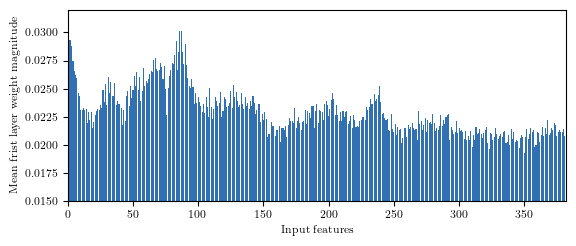

In [8]:
from model import ClassificationModel
from torch import nn

log_folder = 'logs7/bl/my_model/'

models_weights = []
for model_version in os.listdir(log_folder):
    # open chechpoint file stored under model_version/checkpoints
    checkpoint_filename = os.listdir(os.path.join(log_folder, model_version, 'checkpoints'))[0]
    # print(checkpoint_filename)
    
    model = ClassificationModel.load_from_checkpoint(os.path.join(log_folder, model_version, 'checkpoints', checkpoint_filename))

    weights = model.layers[1].weight.detach().cpu().numpy()
    mean_weights = np.mean(np.abs(weights), axis=0)
    models_weights.append(mean_weights)
weights_mean = np.mean(models_weights, axis=0)
weights_std = np.std(models_weights, axis=0)

set_plotting_style("latex")

fig, ax = plt.subplots(1,1,figsize=(5.8,2.5))
# plt.errorbar(np.arange(0, weights_mean.shape[0]), weights_mean, yerr=weights_std)
ax.bar(np.arange(1, weights_mean.shape[0]+1), weights_mean, color=tum_blue_brand)
ax.set_xlabel("Input features")
ax.set_ylabel("Mean frist layer weight magnitude")
ax.set_ylim(0.015,0.032)
ax.set_xlim(0, weights_mean.shape[0]+1)
fig.tight_layout()
fig.savefig('../../figures/bl_models_weights.svg', bbox_inches='tight', format='svg')


Plot mean first layer weights for hm models

In [ ]:
from model import ClassificationModel
from torch import nn

log_folder = 'logs7/hm/my_model/'

models_weights = []
for model_version in os.listdir(log_folder):
    # open chechpoint file stored under model_version/checkpoints
    checkpoint_filename = os.listdir(os.path.join(log_folder, model_version, 'checkpoints'))[0]
    # print(checkpoint_filename)
    
    model = ClassificationModel.load_from_checkpoint(os.path.join(log_folder, model_version, 'checkpoints', checkpoint_filename))

    weights = model.layers[1].weight.detach().cpu().numpy()
    mean_weights = np.mean(np.abs(weights), axis=0)
    models_weights.append(mean_weights)
weights_mean = np.mean(models_weights, axis=0)
weights_std = np.std(models_weights, axis=0)


set_plotting_style("latex")

fig, ax = plt.subplots(1,1,figsize=(5.8,2.5))
# plt.errorbar(np.arange(0, weights_mean.shape[0]), weights_mean, yerr=weights_std)
ax.bar(np.arange(1, weights_mean.shape[0]+1), weights_mean, color=tum_blue_brand)
ax.vlines(380.5, 0.015, 0.04, color='k', linestyles="dashed")
ax.text(190, 0.0365, 'Spectral Inputs', ha='center', va='bottom')
ax.text(380+33, 0.0365, 'Heatmap\n Inputs', ha='center', va='bottom')
ax.set_xlabel("Input features")
ax.set_ylabel("Mean frist layer weight magnitude")
ax.set_ylim(0.015,0.04)
ax.set_xlim(0, weights_mean.shape[0]+1)
fig.tight_layout()
fig.savefig('../../figures/hm_models_weights.svg', bbox_inches='tight', format='svg')

fig, ax = plt.subplots(1,1,figsize=(5.8,2.5))
ax.bar(np.arange(381,392), weights_mean[-66:-55], color=tum_grey_1)
ax.plot(np.arange(381,392), np.repeat(np.mean(weights_mean[-66:-55]),11), color=tum_grey_1, linestyle=':')
ax.bar(np.arange(392,403), weights_mean[-55:-44], color=tum_grey_3)
ax.plot(np.arange(392,403), np.repeat(np.mean(weights_mean[-55:-44]),11), color=tum_grey_3, linestyle=':')
ax.bar(np.arange(403,414), weights_mean[-44:-33], color=tum_grey_5)
ax.plot(np.arange(403,414), np.repeat(np.mean(weights_mean[-44:-33]),11), color=tum_grey_5, linestyle=':')
ax.bar(np.arange(414,425), weights_mean[-33:-22], color=tum_blue_dark)
ax.plot(np.arange(414,425), np.repeat(np.mean(weights_mean[-33:-22]),11), color=tum_blue_dark, linestyle=':')
ax.bar(np.arange(425,436), weights_mean[-22:-11], color=tum_blue_dark_2)
ax.plot(np.arange(425,436), np.repeat(np.mean(weights_mean[-22:-11]),11), color=tum_blue_dark_2, linestyle=':')
ax.bar(np.arange(436,447), weights_mean[-11:], color=tum_blue_brand)
ax.plot(np.arange(436,447), np.repeat(np.mean(weights_mean[-11:]),11), color=tum_blue_brand, linestyle=':')
ax.set_xlabel("Input features")
ax.set_ylabel("Mean first layer weight magnitude")
ax.set_ylim(0.015,0.04)
ax.set_xlim(380, 447)
fig.tight_layout()
fig.savefig('../../figures/hm_models_weights_zoomed.svg', bbox_inches='tight', format='svg')


fig, ax = plt.subplots(1,1,figsize=(4.8,2.5))
hm_list = [weights_mean[-66:-55], weights_mean[-55:-44], weights_mean[-44:-33], weights_mean[-33:-22], weights_mean[-22:-11], weights_mean[-11:]]
hm_endmember_mean = np.mean(hm_list, axis=0)
ax.bar(np.arange(11), hm_endmember_mean, color=tum_blue_brand, width=0.5)
ax.set_ylim(0.02,0.032)
ax.set_xlim(-0.5, 10.5)
ax.set_xticks(range(11))
ax.set_xticklabels(["oxCytc", "redCytc", "oxCytb", "redCytb", "oxCCO", "redCCO", "HHb", "HbO$_2$", "water", "lipids", "a'"], rotation=45)
ax.set_ylabel("Mean frist layer weight magnitude")
fig.tight_layout()
fig.savefig('../../figures/hm_models_weights_endmembers.svg', bbox_inches='tight', format='svg')

NameError: name 'os' is not defined

(447,)


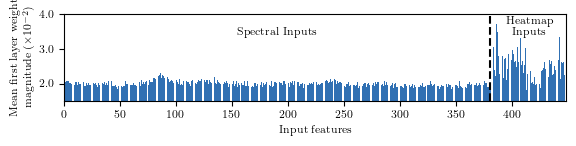

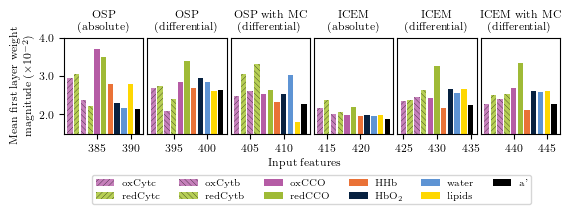

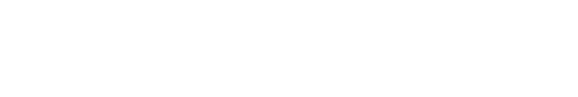

In [131]:
from model import ClassificationModel
from torch import nn
import matplotlib.ticker as ticker
import matplotlib as mpl

log_folder = 'logs7/hm/my_model/'

models_weights = []
for model_version in os.listdir(log_folder):
    # open chechpoint file stored under model_version/checkpoints
    checkpoint_filename = os.listdir(os.path.join(log_folder, model_version, 'checkpoints'))[0]
    # print(checkpoint_filename)
    
    model = ClassificationModel.load_from_checkpoint(os.path.join(log_folder, model_version, 'checkpoints', checkpoint_filename))

    weights = model.layers[1].weight.detach().cpu().numpy()
    mean_weights = np.mean(np.abs(weights), axis=0)
    models_weights.append(mean_weights)
weights_mean = np.mean(models_weights, axis=0)
weights_std = np.std(models_weights, axis=0)


set_plotting_style("latex")

fig, ax = plt.subplots(1,1,figsize=(5.8,1.5))
# plt.errorbar(np.arange(0, weights_mean.shape[0]), weights_mean, yerr=weights_std)
ax.bar(np.arange(1, weights_mean.shape[0]+1), weights_mean, color=tum_blue_brand)
ax.vlines(380.5, 0.015, 0.04, color='k', linestyles="dashed")
ax.text(190, 0.033, 'Spectral Inputs', ha='center', va='bottom')
ax.text(380+35, 0.033, 'Heatmap\n Inputs', ha='center', va='bottom')
ax.set_xlabel("Input features")
ax.set_ylabel("Mean first layer weight\nmagnitude ($\\times 10^{-2}$)")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x * 100:.1f}'))
ax.set_ylim(0.015,0.04)
ax.set_xlim(0, weights_mean.shape[0]+1)
fig.tight_layout()
fig.savefig('../../figures/classification/hm_mean_model_weights.svg', bbox_inches='tight', format='svg')

mpl.rcParams['hatch.linewidth'] = 0.2
hm_types = ["OSP\n(absolute)", "OSP\n(differential)", "OSP with MC\n(differential)", "ICEM\n(absolute)", "ICEM\n(differential)", "ICEM with MC\n(differential)"]
hm_hatches = ['//////', '//////', '\\\\\\\\\\\\', '\\\\\\\\\\\\', '', '', '', '', '', '', '']
# repeated_hm_hatches = [item for item in hm_hatches for _ in range(11)]
cyt_colors = ['#c680bb', '#b6ce55', '#c680bb', '#b6ce55', tum_pink, tum_green, tum_red, tum_blue_dark, tum_blue_light, tum_yellow, '#000000']
endmembers = ["oxCytc", "redCytc", "oxCytb", "redCytb", "oxCCO", "redCCO", "HHb", "HbO$_2$", "water", "lipids", "a'"]
# fig, ax = plt.subplots(1,1,figsize=(5.8,1.5))
feature_idx = 381
weight_idx = -66
fig, axs = plt.subplots(1,6,figsize=(6.4,1.5))
print(weights_mean.shape)
for i in range(6):
    if i != 0:
        axs[i].set_yticks([])
    if i == 5:
        weights = weights_mean[-11:]
    else:
        weights = weights_mean[weight_idx:weight_idx+11]
    bars = axs[i].bar(np.arange(feature_idx,feature_idx+11), weights, color=cyt_colors, hatch=hm_hatches)
    axs[i].set_xlim(feature_idx-1+0.1,feature_idx+11-0.1)
    axs[i].set_ylim(0.015,0.04)
    axs[i].set_title(hm_types[i], fontsize = "medium")
    axs[i].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x * 100:.1f}'))
    feature_idx = feature_idx + 11
    weight_idx = weight_idx + 11

plt.subplots_adjust(wspace=0.05, bottom=0.24)
fig.supxlabel("Input features", fontsize='medium')
axs[0].set_ylabel("Mean first layer weight\nmagnitude ($\\times 10^{-2}$)")
fig.legend(bars, endmembers, loc='lower center', bbox_to_anchor=(0.512, -0.26), ncol=6, fontsize='small')
# fig.tight_layout()
fig.savefig('../../figures/classification/hm_mean_model_weights_zoomed.svg', bbox_inches='tight', format='svg')
plot_ref_full()

Plot mean weights for hm_only model

[0.05171128 0.05274765 0.05071883 0.04935689 0.05496708 0.05718104
 0.05023234 0.0521085  0.05267569 0.0491478  0.05243107]


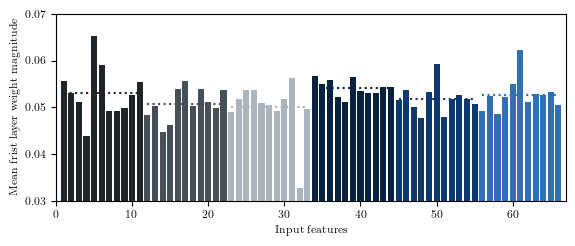

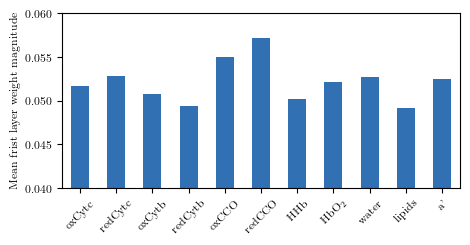

In [6]:
from model import ClassificationModel
from torch import nn

log_folder = 'logs7/hm_only/my_model/'

models_weights = []
for model_version in os.listdir(log_folder):
    # open chechpoint file stored under model_version/checkpoints
    checkpoint_filename = os.listdir(os.path.join(log_folder, model_version, 'checkpoints'))[0]
    # print(checkpoint_filename)
    
    model = ClassificationModel.load_from_checkpoint(os.path.join(log_folder, model_version, 'checkpoints', checkpoint_filename))

    weights = model.layers[1].weight.detach().cpu().numpy()
    mean_weights = np.mean(np.abs(weights), axis=0)
    models_weights.append(mean_weights)
weights_mean = np.mean(models_weights, axis=0)
weights_std = np.std(models_weights, axis=0)


set_plotting_style("latex")

fig, ax = plt.subplots(1,1,figsize=(5.8,2.5))
ax.bar(np.arange(1,12), weights_mean[-66:-55], color=tum_grey_1)
ax.plot(np.arange(1,12), np.repeat(np.mean(weights_mean[-66:-55]),11), color=tum_grey_1, linestyle=':')
ax.bar(np.arange(12,23), weights_mean[-55:-44], color=tum_grey_3)
ax.plot(np.arange(12,23), np.repeat(np.mean(weights_mean[-55:-44]),11), color=tum_grey_3, linestyle=':')
ax.bar(np.arange(23,34), weights_mean[-44:-33], color=tum_grey_5)
ax.plot(np.arange(23,34), np.repeat(np.mean(weights_mean[-44:-33]),11), color=tum_grey_5, linestyle=':')
ax.bar(np.arange(34,45), weights_mean[-33:-22], color=tum_blue_dark)
ax.plot(np.arange(34,45), np.repeat(np.mean(weights_mean[-33:-22]),11), color=tum_blue_dark, linestyle=':')
ax.bar(np.arange(45,56), weights_mean[-22:-11], color=tum_blue_dark_2)
ax.plot(np.arange(45,56), np.repeat(np.mean(weights_mean[-22:-11]),11), color=tum_blue_dark_2, linestyle=':')
ax.bar(np.arange(56,67), weights_mean[-11:], color=tum_blue_brand)
ax.plot(np.arange(56,67), np.repeat(np.mean(weights_mean[-11:]),11), color=tum_blue_brand, linestyle=':')
ax.set_xlabel("Input features")
ax.set_ylabel("Mean frist layer weight magnitude")
ax.set_ylim(0.03,0.07)
ax.set_xlim(0, 67)
fig.tight_layout()
fig.savefig('../../figures/ohm_models_weights.svg', bbox_inches='tight', format='svg')


fig, ax = plt.subplots(1,1,figsize=(4.8,2.5))
hm_list = [weights_mean[-66:-55], weights_mean[-55:-44], weights_mean[-44:-33], weights_mean[-33:-22], weights_mean[-22:-11], weights_mean[-11:]]
hm_endmember_mean = np.mean(hm_list, axis=0)
print(hm_endmember_mean)
ax.bar(np.arange(11), hm_endmember_mean, color=tum_blue_brand, width=0.5)
ax.set_ylim(0.04,0.06)
ax.set_xlim(-0.5, 10.5)
ax.set_xticks(range(11))
ax.set_xticklabels(["oxCytc", "redCytc", "oxCytb", "redCytb", "oxCCO", "redCCO", "HHb", "HbO$_2$", "water", "lipids", "a'"], rotation=45)
ax.set_ylabel("Mean frist layer weight magnitude")
fig.tight_layout()
fig.savefig('../../figures/ohm_models_weights_endmembers.svg', bbox_inches='tight', format='svg')